In [1]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [3]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [4]:
# Use the citipy module to determine city based on latitude and longitude.
from citipy import citipy

In [5]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

581

In [6]:
# Use the tuple() function to display the latitude and longitude combinations.
for coordinate in coordinates:
    print(citipy.nearest_city(coordinate[0], coordinate[1]).city_name,
          citipy.nearest_city(coordinate[0], coordinate[1]).country_code)

amderma ru
orje no
tatawin tn
soldotna us
lagoa pt
haines junction ca
jamestown sh
itarema br
port blair in
nikolsk ru
nikolskoye ru
atuona pf
arraial do cabo br
khatanga ru
aklavik ca
amsterdam us
georgetown sh
upernavik gl
berlevag no
chokurdakh ru
san quintin mx
cape town za
ngukurr au
punta arenas cl
saint-philippe re
hobart au
hofn is
punta arenas cl
nizhneyansk ru
barentsburg sj
ferrol es
vaini to
rikitea pf
albany au
isangel vu
upernavik gl
hami cn
rolim de moura br
chatsu in
myingyan mm
belushya guba ru
kewanee us
albany au
port alfred za
chuy uy
nakusp ca
nikolskoye ru
cape town za
mataura pf
zomin uz
rikitea pf
aykhal ru
vaini to
sakhon nakhon th
ushuaia ar
bambous virieux mu
kupang id
bengkulu id
hermanus za
hermanus za
riyadh sa
celestun mx
qaanaaq gl
winston-salem us
milingimbi au
cape town za
victoria sc
belyy yar ru
bathsheba bb
dikson ru
tuktoyaktuk ca
albany au
sitka us
tilichiki ru
college us
cape town za
bilma ne
kapaa us
malakal sd
jasper ca
albany au
port hedland a

atuona pf
bredasdorp za
ourossogui sn
belushya guba ru
dikson ru
albany au
vaini to
bengkulu id
chuy uy
victoria sc
hilo us
jamestown sh
port blair in
salalah om
alad ph
rikitea pf
ushuaia ar
kachikau bw
bambous virieux mu
bethel us
mahebourg mu
vaini to
carnarvon au
ushuaia ar
huanan cn
jaque pa
albany au
punta arenas cl
qaanaaq gl
rikitea pf
hermanus za
nizhneyansk ru
jamestown sh
butaritari ki
kavaratti in
longyearbyen sj
kapaa us
ushuaia ar
busselton au
karkaralinsk kz
olafsvik is
cabo san lucas mx
aflu dz
victoria sc
puerto ayora ec
namibe ao
souillac mu
ushuaia ar
gao ml
hobart au
nome us
touros br
kavaratti in
arraial do cabo br
ushuaia ar
cockburn town tc
san jeronimo gt
atar mr
albany au
barbar sd
airai pw
dingle ie
rikitea pf
vaini to
nemuro jp
sao filipe cv
puerto ayora ec
cape town za
ilulissat gl
lavrentiya ru
bengkulu id
henties bay na
magnitka ru
butaritari ki
iqaluit ca
klin ru
arraial do cabo br
busselton au
port hedland au
hilo us
mount isa au
paamiut gl
rikitea pf
us

buala sb
taolanaro mg
aguimes es
new norfolk au
la paz bo
goderich sl
namibe ao
dikson ru
laizhou cn
bluff nz
xichang cn
wajima jp
bethel us
yellowknife ca
port alfred za


In [7]:
# Import the requests library
import requests 

# Import the API key
from config import weather_api_key

In [8]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=cImperial&APPID=" + weather_api_key 
print(url)

http://api.openweathermap.org/data/2.5/weather?units=cImperial&APPID=6c1f9ea901c21039b6fb5fcba814d73b


In [9]:
# Import the datetime module from the datetime library.
from datetime import datetime

In [10]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    
# Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | amderma
City not found. Skipping...
Processing Record 2 of Set 1 | orje
Processing Record 3 of Set 1 | tatawin
Processing Record 4 of Set 1 | soldotna
Processing Record 5 of Set 1 | lagoa
Processing Record 6 of Set 1 | haines junction
Processing Record 7 of Set 1 | jamestown
Processing Record 8 of Set 1 | itarema
Processing Record 9 of Set 1 | port blair
Processing Record 10 of Set 1 | nikolsk
Processing Record 11 of Set 1 | nikolskoye
Processing Record 12 of Set 1 | atuona
Processing Record 13 of Set 1 | arraial do cabo
Processing Record 14 of Set 1 | khatanga
Processing Record 15 of Set 1 | aklavik
Processing Record 16 of Set 1 | amsterdam
Processing Record 17 of Set 1 | georgetown
Processing Record 18 of Set 1 | upernavik
Processing Record 19 of Set 1 | berlevag
Processing Record 20 of Set 1 | chokurdakh
Processing Record 21 of Set 1 | san quintin
Processing Record 22 of Set 1 | cape town
Proc

Processing Record 37 of Set 4 | trairi
Processing Record 38 of Set 4 | naron
Processing Record 39 of Set 4 | souillac
Processing Record 40 of Set 4 | port elizabeth
Processing Record 41 of Set 4 | ljaskovec
City not found. Skipping...
Processing Record 42 of Set 4 | nabire
Processing Record 43 of Set 4 | east london
Processing Record 44 of Set 4 | zanjan
Processing Record 45 of Set 4 | terney
Processing Record 46 of Set 4 | vila franca do campo
Processing Record 47 of Set 4 | belozerskoye
Processing Record 48 of Set 4 | bantry
Processing Record 49 of Set 4 | kostinbrod
Processing Record 50 of Set 4 | olinda
Processing Record 1 of Set 5 | saskylakh
Processing Record 2 of Set 5 | oranjestad
Processing Record 3 of Set 5 | colares
Processing Record 4 of Set 5 | ca mau
Processing Record 5 of Set 5 | hambantota
Processing Record 6 of Set 5 | solnechnyy
Processing Record 7 of Set 5 | pathein
Processing Record 8 of Set 5 | okato
Processing Record 9 of Set 5 | dingle
Processing Record 10 of Set

Processing Record 26 of Set 8 | nemuro
Processing Record 27 of Set 8 | magnitka
Processing Record 28 of Set 8 | iqaluit
Processing Record 29 of Set 8 | klin
Processing Record 30 of Set 8 | paamiut
Processing Record 31 of Set 8 | mount clemens
Processing Record 32 of Set 8 | ewa beach
Processing Record 33 of Set 8 | ostrovnoy
Processing Record 34 of Set 8 | marawi
Processing Record 35 of Set 8 | kasongo-lunda
Processing Record 36 of Set 8 | calamar
Processing Record 37 of Set 8 | samusu
City not found. Skipping...
Processing Record 38 of Set 8 | beringovskiy
Processing Record 39 of Set 8 | moberly
Processing Record 40 of Set 8 | turukhansk
Processing Record 41 of Set 8 | tuatapere
Processing Record 42 of Set 8 | half moon bay
Processing Record 43 of Set 8 | jinchang
Processing Record 44 of Set 8 | kuche
City not found. Skipping...
Processing Record 45 of Set 8 | baracoa
Processing Record 46 of Set 8 | mungaoli
Processing Record 47 of Set 8 | dorado
Processing Record 48 of Set 8 | naze
P

Processing Record 11 of Set 12 | bendigo
Processing Record 12 of Set 12 | roald
Processing Record 13 of Set 12 | deori khas
Processing Record 14 of Set 12 | shimoda
Processing Record 15 of Set 12 | kaitangata
Processing Record 16 of Set 12 | alice
Processing Record 17 of Set 12 | deputatskiy
Processing Record 18 of Set 12 | srednekolymsk
Processing Record 19 of Set 12 | gavle
Processing Record 20 of Set 12 | diego de almagro
Processing Record 21 of Set 12 | urla
Processing Record 22 of Set 12 | arman
Processing Record 23 of Set 12 | teahupoo
Processing Record 24 of Set 12 | alugan
Processing Record 25 of Set 12 | haibowan
City not found. Skipping...
Processing Record 26 of Set 12 | buala
Processing Record 27 of Set 12 | aguimes
Processing Record 28 of Set 12 | la paz
Processing Record 29 of Set 12 | laizhou
Processing Record 30 of Set 12 | xichang
Processing Record 31 of Set 12 | wajima
-----------------------------
Data Retrieval Complete      
-----------------------------


In [11]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Orje,59.4802,11.6602,288.03,89,67,2.28,NO,2021-08-06 04:56:27
1,Tatawin,32.9297,10.4518,299.64,89,0,2.16,TN,2021-08-06 04:56:27
2,Soldotna,60.4878,-151.0583,290.35,91,100,2.54,US,2021-08-06 04:56:27
3,Lagoa,39.0500,-27.9833,295.41,89,19,8.42,PT,2021-08-06 04:56:28
4,Haines Junction,60.7522,-137.5108,291.12,68,93,1.03,CA,2021-08-06 04:54:14
5,Jamestown,42.0970,-79.2353,291.32,87,38,0.45,US,2021-08-06 04:56:28
6,Itarema,-2.9248,-39.9167,298.08,79,28,5.47,BR,2021-08-06 04:56:28
7,Port Blair,11.6667,92.7500,301.94,81,100,9.04,IN,2021-08-06 04:54:02
8,Nikolsk,53.7189,46.0712,293.56,52,73,1.75,RU,2021-08-06 04:56:29
9,Nikolskoye,59.7035,30.7861,289.14,75,99,2.77,RU,2021-08-06 04:56:29


In [12]:
new_column_order = ["City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]
city_data_df = city_data_df[new_column_order]
city_data_df.head(10)

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Orje,NO,2021-08-06 04:56:27,59.4802,11.6602,288.03,89,67,2.28
1,Tatawin,TN,2021-08-06 04:56:27,32.9297,10.4518,299.64,89,0,2.16
2,Soldotna,US,2021-08-06 04:56:27,60.4878,-151.0583,290.35,91,100,2.54
3,Lagoa,PT,2021-08-06 04:56:28,39.0500,-27.9833,295.41,89,19,8.42
4,Haines Junction,CA,2021-08-06 04:54:14,60.7522,-137.5108,291.12,68,93,1.03
5,Jamestown,US,2021-08-06 04:56:28,42.0970,-79.2353,291.32,87,38,0.45
6,Itarema,BR,2021-08-06 04:56:28,-2.9248,-39.9167,298.08,79,28,5.47
7,Port Blair,IN,2021-08-06 04:54:02,11.6667,92.7500,301.94,81,100,9.04
8,Nikolsk,RU,2021-08-06 04:56:29,53.7189,46.0712,293.56,52,73,1.75
9,Nikolskoye,RU,2021-08-06 04:56:29,59.7035,30.7861,289.14,75,99,2.77


In [13]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [14]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

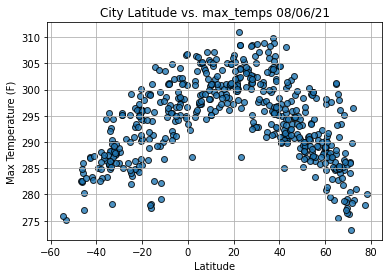

In [15]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. max_temps "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()


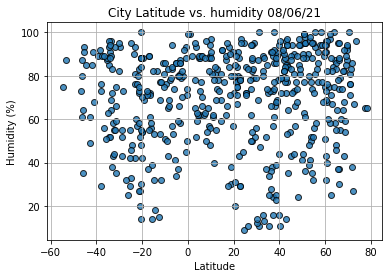

In [16]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig2.png")

# Show plot.
plt.show()


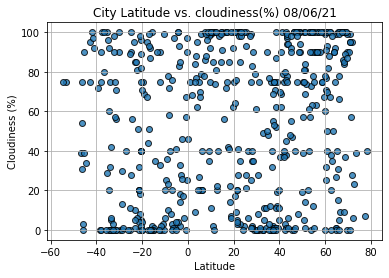

In [17]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. cloudiness(%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig3.png")

# Show plot.
plt.show()


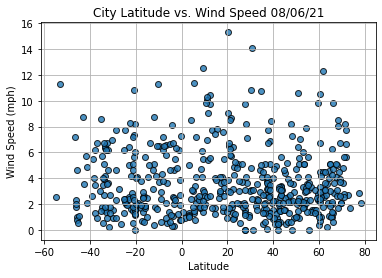

In [18]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()

In [19]:
# Import linear regression from the SciPy stats module.
from scipy.stats import linregress

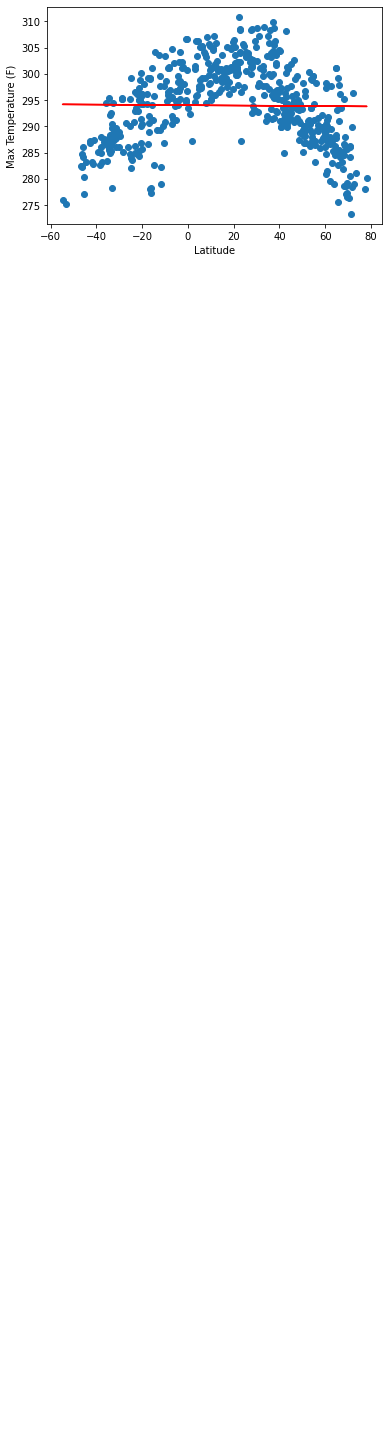

In [20]:
# Perform linear regression.
(slope, intercept, r_value, p_value, std_err) = linregress(lats, max_temps)

# Calculate the regression line "y values" from the slope and intercept.
regress_values = lats * slope + intercept

# Get the equation of the line.
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Create a scatter plot of the x and y values.
plt.scatter(lats,max_temps)
# Plot the regression line with the x-values and the y coordinates based on the intercept and slope.
plt.plot(lats,regress_values,"r")
# Annotate the text for the line equation and add its coordinates.
plt.annotate(line_eq, (10,40), fontsize=15, color="red")
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (F)')
plt.show()

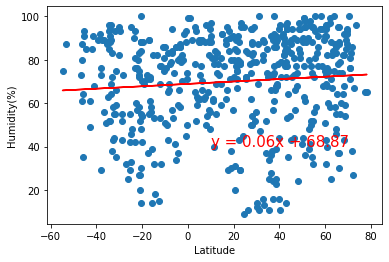

In [21]:
# Perform linear regression.
(slope, intercept, r_value, p_value, std_err) = linregress(lats, humidity)

# Calculate the regression line "y values" from the slope and intercept.
regress_values = lats * slope + intercept

# Get the equation of the line.
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Create a scatter plot of the x and y values.
plt.scatter(lats,humidity)
# Plot the regression line with the x-values and the y coordinates based on the intercept and slope.
plt.plot(lats,regress_values,"r")
# Annotate the text for the line equation and add its coordinates.
plt.annotate(line_eq, (10,40), fontsize=15, color="red")
plt.xlabel('Latitude')
plt.ylabel('Humidity(%)')
plt.show()

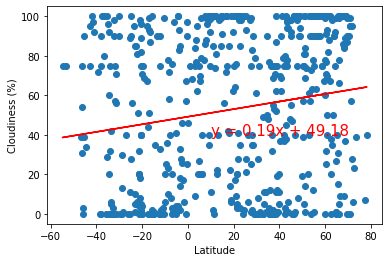

In [22]:
# Perform linear regression.
(slope, intercept, r_value, p_value, std_err) = linregress(lats, cloudiness)

# Calculate the regression line "y values" from the slope and intercept.
regress_values = lats * slope + intercept

# Get the equation of the line.
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Create a scatter plot of the x and y values.
plt.scatter(lats,cloudiness)
# Plot the regression line with the x-values and the y coordinates based on the intercept and slope.
plt.plot(lats,regress_values,"r")
# Annotate the text for the line equation and add its coordinates.
plt.annotate(line_eq, (10,40), fontsize=15, color="red")
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.show()

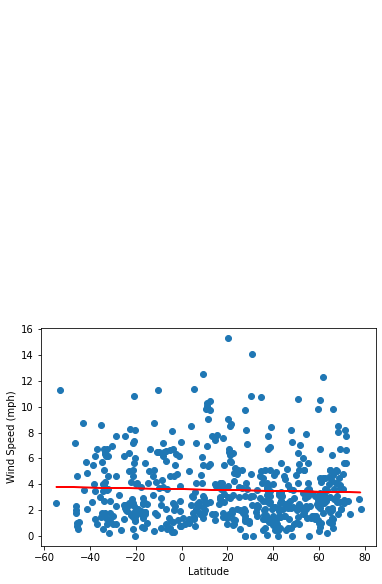

In [50]:
# Perform linear regression.
(slope, intercept, r_value, p_value, std_err) = linregress(lats, wind_speed)

# Calculate the regression line "y values" from the slope and intercept.
regress_values = lats * slope + intercept

# Get the equation of the line.
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Create a scatter plot of the x and y values.
plt.scatter(lats, wind_speed)
# Plot the regression line with the x-values and the y coordinates based on the intercept and slope.
plt.plot(lats,regress_values,"r")
# Annotate the text for the line equation and add its coordinates.
plt.annotate(line_eq, (10,40), fontsize=15, color="red")
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')
plt.show()

In [78]:
# Import linregress
from scipy.stats import linregress

# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):

    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.show()

In [79]:
city_data_df.loc[(city_data_df["Lat"] >= 0)].head()

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Orje,NO,2021-08-06 04:56:27,59.4802,11.6602,288.03,89,67,2.28
1,Tatawin,TN,2021-08-06 04:56:27,32.9297,10.4518,299.64,89,0,2.16
2,Soldotna,US,2021-08-06 04:56:27,60.4878,-151.0583,290.35,91,100,2.54
3,Lagoa,PT,2021-08-06 04:56:28,39.0500,-27.9833,295.41,89,19,8.42
4,Haines Junction,CA,2021-08-06 04:54:14,60.7522,-137.5108,291.12,68,93,1.03


In [80]:
# Create Northern and Southern Hemisphere DataFrames.
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

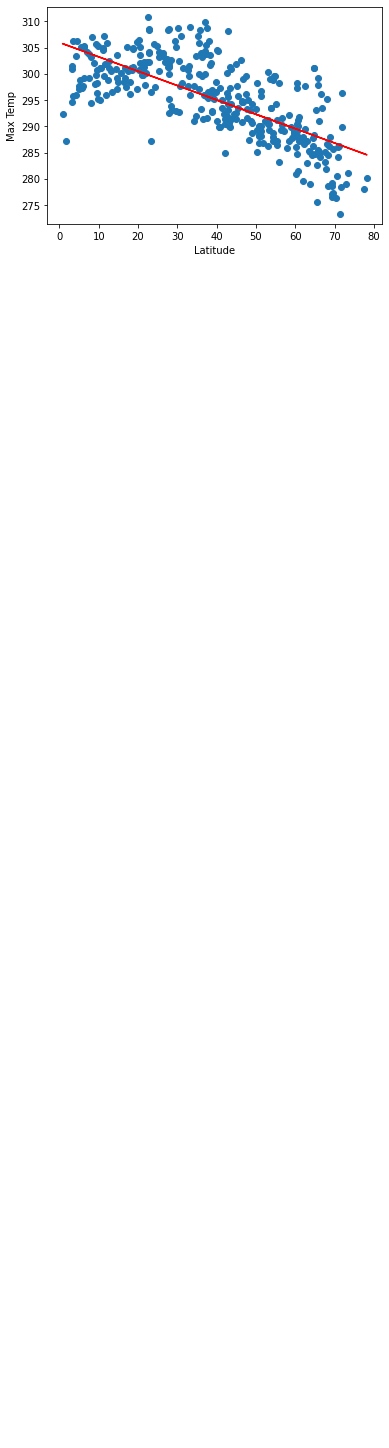

NameError: name 'y_label' is not defined

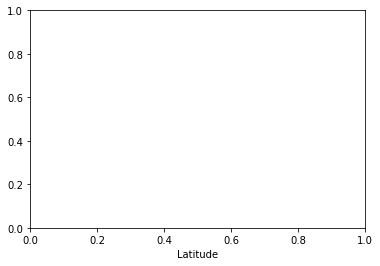

In [81]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for Maximum Temperature', 'Max Temp',(10,40))
plt.xlabel('Latitude')
plt.ylabel(y_label)
plt.title(f"Line Regression on Northern Hemisphere for Maximum Temperature")
plt.show()

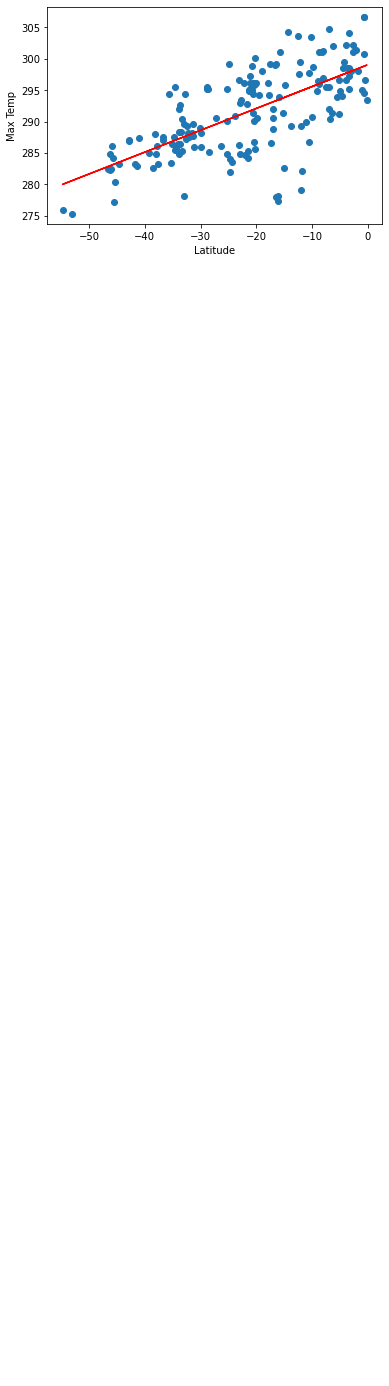

NameError: name 'y_label' is not defined

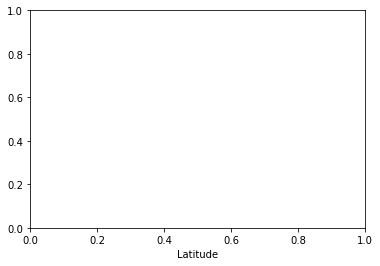

In [82]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for Maximum Temperature', 'Max Temp',(-50,90))
plt.xlabel('Latitude')
plt.ylabel(y_label)
plt.title(f"Line Regression on Southern Hemisphere for Maximum Temperature")
plt.show()

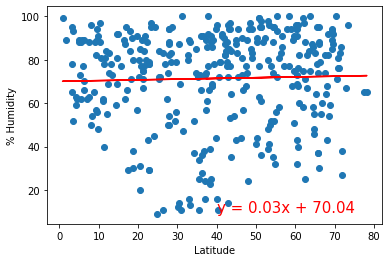

In [83]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for % Humidity', '% Humidity',(40,10))

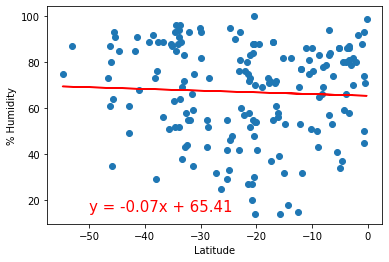

In [90]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for % Humidity', '% Humidity',(-50,15))

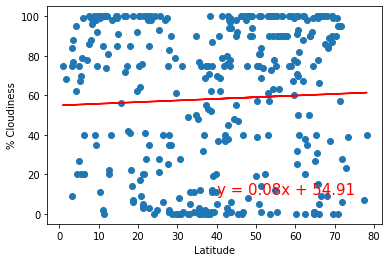

In [98]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for % Cloudiness', '% Cloudiness',(40,10))

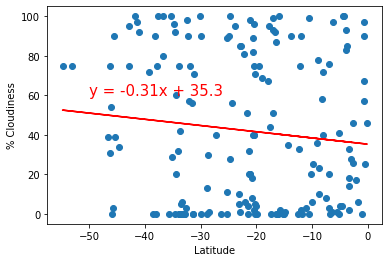

In [101]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for % Cloudiness', '% Cloudiness',(-50,60))

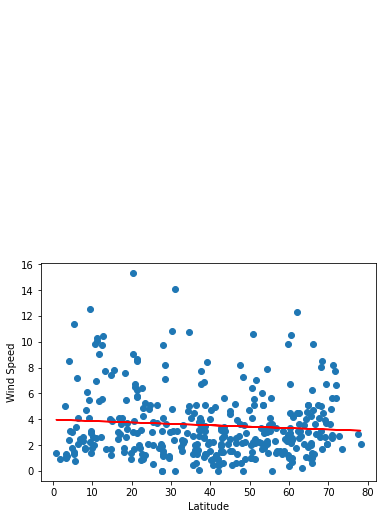

In [103]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for Wind Speed', 'Wind Speed',(40,35))

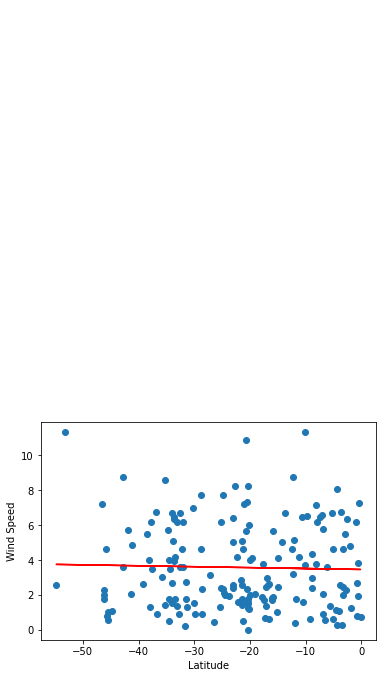

In [105]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for Wind Speed', 'Wind Speed',(-50,35))